In [1]:
#Churn Rate Prediction using Classification Algorithms
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
#importing dataset
dataset = pd.read_csv('./Churn_Modelling.csv')

In [3]:
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
dataset.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
X = dataset.iloc[:,3:-1].values
y = dataset.iloc[:,-1].values

In [6]:
print(X)
print(X.shape)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]
(10000, 10)


In [7]:
y

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [8]:
# Encoding categorical data
# Label Encoding the "Gender" column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

# One Hot Encoding the "Geography" column
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [9]:
print(X)
print(X.shape)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]
(10000, 12)


In [127]:
X

,0,1,2,3,4,5,6,7,8,9,10
0,-0.578736,-0.573809,-0.326221,-1.095988,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886
1,-0.578736,1.742740,-0.440036,-1.095988,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534
2,-0.578736,-0.573809,-1.536794,-1.095988,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687
3,-0.578736,-0.573809,0.501521,-1.095988,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918
4,-0.578736,1.742740,2.063884,-1.095988,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276
...,...,...,...,...,...,...,...,...,...,...,...
9995,-0.578736,-0.573809,1.246488,0.912419,0.007457,-0.004426,-1.225848,0.807737,0.646092,-1.030670,-0.066419
9996,-0.578736,-0.573809,-1.391939,0.912419,-0.373958,1.724464,-0.306379,-0.911583,0.646092,0.970243,0.027988
9997,-0.578736,-0.573809,0.604988,-1.095988,-0.278604,0.687130,-1.225848,-0.911583,-1.547768,0.970243,-1.008643
9998,1.727904,-0.573809,1.256835,0.912419,0.293517,-0.695982,-0.022608,0.807737,0.646092,-1.030670,-0.125231


In [10]:
X=X[:,1:]

In [11]:
print(X)
print(X.shape)

[[0.0 0.0 619 ... 1 1 101348.88]
 [0.0 1.0 608 ... 0 1 112542.58]
 [0.0 0.0 502 ... 1 0 113931.57]
 ...
 [0.0 0.0 709 ... 0 1 42085.58]
 [1.0 0.0 772 ... 1 0 92888.52]
 [0.0 0.0 792 ... 1 0 38190.78]]
(10000, 11)


In [12]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [13]:
print(X)
print(X.shape)

[[-0.57873591 -0.57380915 -0.32622142 ...  0.64609167  0.97024255
   0.02188649]
 [-0.57873591  1.74273971 -0.44003595 ... -1.54776799  0.97024255
   0.21653375]
 [-0.57873591 -0.57380915 -1.53679418 ...  0.64609167 -1.03067011
   0.2406869 ]
 ...
 [-0.57873591 -0.57380915  0.60498839 ... -1.54776799  0.97024255
  -1.00864308]
 [ 1.72790383 -0.57380915  1.25683526 ...  0.64609167 -1.03067011
  -0.12523071]
 [-0.57873591 -0.57380915  1.46377078 ...  0.64609167 -1.03067011
  -1.07636976]]
(10000, 11)


In [14]:
#splitting dataset to train and test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [15]:
len(X_train)

8000

[0.02911057 0.01261703 0.13447524 0.01800315 0.23442154 0.10462851
 0.13116912 0.14580063 0.02179592 0.03362596 0.13435234]


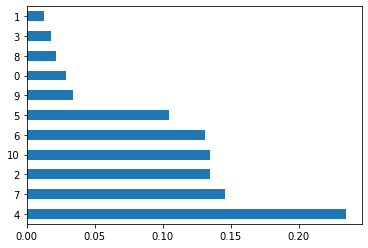

In [16]:
from sklearn.ensemble import ExtraTreesClassifier
X=pd.DataFrame(X)
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_,index=X.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.show()

In [17]:
#Aritificial Neural Networks algorithm
#importing libraries
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.
C:\Users\SINDHU\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\SINDHU\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\SINDHU\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\SINDHU\Anaconda3\lib\site-packages\tensorflow\python\framework\dtype

In [18]:
#initialising ANN
classifier_ann = Sequential()

In [19]:
#building the ann
#adding input and first hidden layers
classifier_ann.add(Dense(units = 6,input_shape = (11,),activation = 'relu',kernel_initializer = 'uniform'))
classifier_ann.add(Dense(units = 6,activation = 'relu'))

Instructions for updating:
Colocations handled automatically by placer.


In [20]:
#adding output layer
classifier_ann.add(Dense(units = 1,activation = 'sigmoid'))

In [21]:
#applying stochastic gradient to the ann
Adam = keras.optimizers.Adam(lr = 0.1)
classifier_ann.compile(optimizer = 'Adam',loss = 'binary_crossentropy',metrics = ['accuracy'])

In [22]:
#fitting the ANN to the training set
classifier_ann.fit(X_train,y_train,batch_size = 10,epochs = 100)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
8000/8000 [==============================] - 1s 182us/step - loss: 0.4732 - accuracy: 0.8030
Epoch 2/100
8000/8000 [==============================] - 1s 94us/step - loss: 0.3804 - accuracy: 0.8370
Epoch 3/100
8000/8000 [==============================] - 1s 83us/step - loss: 0.3645 - accuracy: 0.8491
Epoch 4/100
8000/8000 [==============================] - 1s 86us/step - loss: 0.3562 - accuracy: 0.8521
Epoch 5/100
8000/8000 [==============================] - 1s 80us/step - loss: 0.3528 - accuracy: 0.8566
Epoch 6/100
8000/8000 [==============================] - 1s 82us/step - loss: 0.3507 - accuracy: 0.8558
Epoch 7/100
8000/8000 [==============================] - 1s 81us/step - loss: 0.3483 - accuracy: 0.8599
Epoch 8/100
8000/8000 [==============================] - 1s 85us/step - loss: 0.3473 - accuracy: 0.8600
Epoch 9/100
8000/8000 [==============================] - 1s 85us/step - loss: 0.3481 - accuracy: 0.8583
Epoch 10/100
80

8000/8000 [==============================] - 1s 83us/step - loss: 0.3338 - accuracy: 0.8654
Epoch 77/100
8000/8000 [==============================] - 1s 85us/step - loss: 0.3333 - accuracy: 0.8625
Epoch 78/100
8000/8000 [==============================] - 1s 81us/step - loss: 0.3343 - accuracy: 0.8655
Epoch 79/100
8000/8000 [==============================] - 1s 84us/step - loss: 0.3335 - accuracy: 0.8661
Epoch 80/100
8000/8000 [==============================] - 1s 80us/step - loss: 0.3332 - accuracy: 0.8654
Epoch 81/100
8000/8000 [==============================] - 1s 79us/step - loss: 0.3337 - accuracy: 0.8654
Epoch 82/100
8000/8000 [==============================] - 1s 84us/step - loss: 0.3332 - accuracy: 0.8665
Epoch 83/100
8000/8000 [==============================] - 1s 79us/step - loss: 0.3332 - accuracy: 0.8660
Epoch 84/100
8000/8000 [==============================] - 1s 81us/step - loss: 0.3336 - accuracy: 0.8643
Epoch 85/100
8000/8000 [==============================] - 1s 86us/st

In [23]:
#Logistic Regression algorithm
from sklearn.linear_model import LogisticRegression
classifier_lr = LogisticRegression(random_state = 0)
classifier_lr.fit(X_train,y_train)

LogisticRegression(random_state=0)

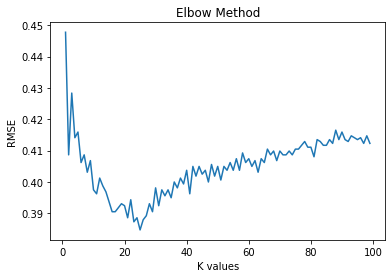

In [24]:
#Kth Nearest Neighbor algorithm
from sklearn.metrics import mean_squared_error 
from math import sqrt
from sklearn.neighbors import KNeighborsClassifier
rmse=[]

for i  in range(1,100):
    knn=KNeighborsClassifier(n_neighbors=i,metric='minkowski',p=2)
    knn.fit(X_train,y_train)
    pred=knn.predict(X_test) 
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse.append(error) #store rmse values
    
#plotting the rmse values against k values
plt.plot(range(1,100),rmse) #elbow curve 
plt.title('Elbow Method')
plt.xlabel('K values')
plt.ylabel('RMSE')
plt.show()


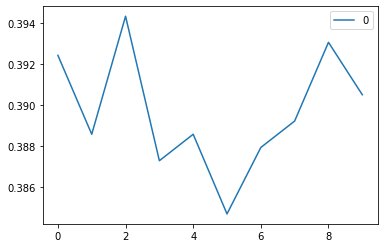

In [25]:
rmse=[]

for i  in range(20,30):
    knn=KNeighborsClassifier(n_neighbors=i,metric='minkowski',p=2)
    knn.fit(X_train,y_train)
    pred=knn.predict(X_test) 
    error = sqrt(mean_squared_error(y_test,pred))
    rmse.append(error)
    

curve = pd.DataFrame(rmse)
curve.plot()


In [26]:
#best k value is 25
#fitting knn classifier with k value 25
classifier_knn = KNeighborsClassifier(n_neighbors=25,metric='minkowski',p=2)
classifier_knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=25)

In [27]:
y_ann=classifier_ann.predict(X_test)
y_ann=(y_ann>0.5)
y_lr=classifier_lr.predict(X_test)
y_knn=classifier_knn.predict(X_test)


In [45]:
y_lr=pd.DataFrame(y_lr)
y_knn=pd.DataFrame(y_knn)
y_result = (y_ann + y_lr + y_knn)/3
y_result = (y_result > 0.5)
y_result
y_im=np.zeros(2000,int)
y_im=pd.DataFrame(y_im)
y_im

,0
0,0
1,0
2,0
3,0
4,0
...,...
1995,0
1996,0
1997,0
1998,0


In [46]:
#confusion matrices
from sklearn.metrics import confusion_matrix
cm_ann=confusion_matrix(y_test,y_ann)
cm_lr=confusion_matrix(y_test,y_lr)
cm_knn=confusion_matrix(y_test,y_knn)
cm_result=confusion_matrix(y_test,y_result)
cm_im=confusion_matrix(y_test,y_im)


In [47]:
print(cm_ann)
print(cm_lr)
print(cm_knn)
print(cm_result)
print(cm_im)

[[1513   82]
 [ 191  214]]
[[1526   69]
 [ 309   96]]
[[1564   31]
 [ 265  140]]
[[1565   30]
 [ 255  150]]
[[1595    0]
 [ 405    0]]


In [31]:
# accuracy = (TP + TN)/(TP + TN + FP + FN)
print((cm_ann[0][0]+cm_ann[1][1])/2000)
print((cm_lr[0][0]+cm_lr[1][1])/2000)
print((cm_knn[0][0]+cm_knn[1][1])/2000)
print((cm_result[0][0]+cm_result[1][1])/2000)

0.8635
0.811
0.852
0.844


In [32]:
classifier_ann.predict(X_test)

array([[0.33532375],
       [0.32906651],
       [0.16913632],
       ...,
       [0.14852685],
       [0.1584734 ],
       [0.220083  ]], dtype=float32)

In [68]:
#importing libraries for ensembling
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier as gbc


In [78]:
#Adaboost
classifier_ada = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=150)
classifier_ada.fit(X_train,y_train)


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=150)

In [70]:
#cross validation 
accuracies=cross_val_score(estimator=classifier_ada,X=X_train,y=y_train,cv=10)
print("accuracies are ",accuracies)
print("mean accuracy : ",accuracies.mean())
print('var =',accuracies.var())

accuracies are  [0.86625 0.845   0.8775  0.84375 0.83125 0.845   0.8675  0.85125 0.84375
 0.85125]
mean accuracy :  0.8522500000000001
var = 0.00017587499999999968


In [37]:
from sklearn.model_selection import GridSearchCV
parameters={'n_estimators':[100,150,200,250]}
gridsearch1=GridSearchCV(estimator=classifier_ada,param_grid=parameters,scoring='accuracy',cv=10)
gridsearch1=gridsearch1.fit(X_train,y_train)
best_parameters=gridsearch1.best_params_
best_accuracy=gridsearch1.best_score_

In [38]:
print(best_parameters)
print(best_accuracy)

{'n_estimators': 200}
0.85275


In [79]:
y_ada=classifier_ada.predict(X_test)
cm=confusion_matrix(y_test,y_ada)
cm

array([[1506,   89],
       [ 186,  219]], dtype=int64)

In [80]:
#Gradient Boosting
classifier_gb=gbc(n_estimators=200,max_depth=3,learning_rate=0.1)
classifier_gb.fit(X_train,y_train)



GradientBoostingClassifier(n_estimators=200)

In [73]:
#cross validation
accuracies=cross_val_score(estimator=classifier_gb,X=X_train,y=y_train,cv=10)
print("accuracies are ",accuracies)

print("mean accuracy : ",accuracies.mean())
print('var =',accuracies.var())

accuracies are  [0.86375 0.85625 0.87875 0.86125 0.855   0.85625 0.87    0.8575  0.84875
 0.87375]
mean accuracy :  0.862125
var = 7.970312500000027e-05


In [43]:
parameters={'n_estimators':[100,150,200,250],'max_depth':[2,3,4],'learning_rate':[0.1,0.2,0.3]}
gridsearch2=GridSearchCV(estimator=classifier_gb,param_grid=parameters,scoring='accuracy',cv=10)
gridsearch2=gridsearch2.fit(X_train,y_train)
best_parameters=gridsearch2.best_params_
best_accuracy=gridsearch2.best_score_

In [44]:
print(best_parameters)
print(best_accuracy)

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
0.8647500000000001


In [81]:
y_grad=classifier_gb.predict(X_test)
cm2=confusion_matrix(y_test,y_grad)
print(cm)

[[1506   89]
 [ 186  219]]


In [90]:
y_ada=y_ada.reshape(2000,1)

In [91]:
y_ada.shape

(2000, 1)

In [92]:
y_grad=y_grad.reshape(2000,1)

In [93]:
y_grad.shape

(2000, 1)

In [98]:
y=np.abs(y_grad-y_ada)

In [99]:
y.sum()

85

In [100]:
y=(0.35*y_ann)+(0.2*(y_grad+y_ada))+(0.15*y_knn)+(0.1*y_lr)
y=(y>=0.5)

In [101]:
cm_ann=confusion_matrix(y_test,y_ann)
cm_lr=confusion_matrix(y_test,y_lr)
cm_knn=confusion_matrix(y_test,y_knn)
cm_ada=confusion_matrix(y_test,y_ada)
cm_grad=confusion_matrix(y_test,y_grad)
cm_im=confusion_matrix(y_test,y_im)
cm_act=confusion_matrix(y_test,y)

In [104]:
print(cm_lr)
print(cm_knn)
print(cm_ann)
print(cm_ada)
print(cm_grad)
print(cm_act)
print(cm_im)

[[1526   69]
 [ 309   96]]
[[1564   31]
 [ 265  140]]
[[1513   82]
 [ 191  214]]
[[1506   89]
 [ 186  219]]
[[1520   75]
 [ 191  214]]
[[1523   72]
 [ 197  208]]
[[1595    0]
 [ 405    0]]


In [122]:
y=y_ann+y_ada+y_grad+y_lr+y_knn
y=(y>0.5)
cm__=confusion_matrix(y_test,y)
print(cm__)

[[1423  172]
 [ 142  263]]


In [117]:
a=np.array([[1,2,3],[1,2,3]])
np.sum(a,axis=0)

array([2, 4, 6])

In [116]:
a.shape

(3,)

In [120]:
a_del=np.delete(a,1,1)

In [121]:
a_del

array([[1, 3],
       [1, 3]])